In [36]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
from sklearn.datasets import load_wine
import seaborn as sns
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [5]:
def plot_decision_regions(X,y,classifer,test_idx=None,resolution=0.02):
    
    #setup marker generator and color map
    markers=('s','x','o','^','v')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max=X[:,1].min(-1),X[:,1].max()+1
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),
                       np.arange(x2_min,x2_max,resolution))
    z=classifer.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    z=z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y== cl,0],
                    y=X[y== cl,1],
                   alpha=0.8,
                   c=colors[idx],
                   marker=markers[idx],
                   label=cl,
                   edgecolor='black')
    #highlight test samples
    if test_idx:
        #plot all samples
        X_test,y_test=X[test_idx,:],y[test_idx]
        plt.scatter(X_test[:,0],
                    X_test[:,1],
                    c='',
                    edgecolor='blasck',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')

In [9]:
wine=load_wine()

In [12]:
wine['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [14]:
feature=pd.DataFrame(wine['data'][:,-2],columns=['od280/od315_of_diluted_wines'])
feature1=pd.DataFrame(wine['data'][:,-1],columns=['proline'])
data=pd.concat([feature,feature1],axis=1)
target=pd.DataFrame(wine['target'],columns=['class'])
data=pd.concat([data,target],axis=1)

In [17]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [19]:
sc = StandardScaler()
sc=sc.fit(X)
X_std=sc.transform(X)

In [20]:
X_train_std,X_test_std,y_train,y_test=train_test_split(X_std,y,test_size=0.2,random_state=1)

In [34]:
svm=SVC(kernel='linear')
svm.fit(X_train_std,y_train)
svm_predict=svm.predict(X_test_std)

In [37]:
accuracy_score(y_test,svm_predict)

0.9166666666666666

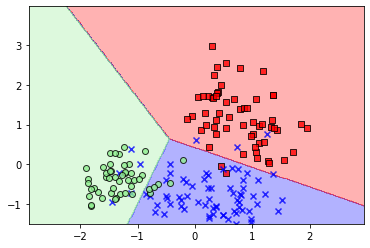

In [38]:
plot_decision_regions(X_std,y,classifer=svm)

In [53]:
svm=SVC(kernel='rbf',gamma=0.7)
svm.fit(X_train_std,y_train)
svm_predict=svm.predict(X_test_std)

In [54]:
accuracy_score(y_test,svm_predict)

0.9166666666666666

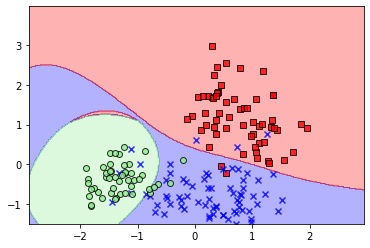

In [55]:
plot_decision_regions(X_std,y,classifer=svm)

In [42]:
svm=SVC(kernel='poly',degree=3)
svm.fit(X_train_std,y_train)
svm_predict=svm.predict(X_test_std)

C:\Users\x5748\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [43]:
accuracy_score(y_test,svm_predict)

0.8888888888888888

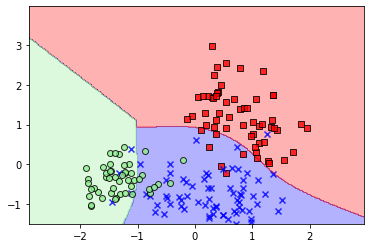

In [32]:
plot_decision_regions(X_std,y,classifer=svm)